# Step 1: Importing Necessary Libraries


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Step 2: Load the Dataset


In [2]:
df = pd.read_csv("NFL Play by Play 2009-2016 (v3).csv")

C:\Users\rajug\AppData\Local\Temp\ipykernel_924\2977703501.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NFL Play by Play 2009-2016 (v3).csv")


# Step 3: Inspect the Data


In [3]:
df.shape

(362447, 102)

In [4]:
# Check the first few rows of the dataset

df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [5]:
df.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,3.624470e+05,362447.000000,362447.000000,308229.000000,362447.000000,362259.000000,362073.000000,361724.000000,361724.000000,362447.000000,...,141713.000000,340504.000000,340504.000000,339087.000000,339087.000000,340454.000000,357630.000000,141709.000000,141491.000000,362447.000000
mean,2.012664e+09,12.347088,2.578231,2.001226,7.386076,1695.234346,20.574649,28.413542,48.616807,7.305236,...,-0.386522,0.533889,0.466561,0.534217,0.466185,0.501311,0.002163,0.015209,-0.010492,2012.522071
std,2.292258e+06,7.168173,1.130259,1.006003,4.642132,1063.065717,18.030486,13.002355,25.161965,4.863445,...,1.972964,0.286415,0.286468,0.288647,0.288694,0.288207,0.045326,0.056422,0.067972,2.290084
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011091e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,...,-0.964562,0.323129,0.230595,0.319464,0.226867,0.274964,-0.014589,-0.011355,-0.018623,2011.000000
50%,2.013091e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,...,0.000000,0.531286,0.469040,0.533689,0.466617,0.504349,0.000000,0.003557,0.000000,2013.000000
75%,2.015091e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,...,0.484913,0.770011,0.677566,0.773729,0.681018,0.726995,0.014800,0.035702,0.011371,2015.000000
max,2.017010e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2016.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 282.1+ MB


In [7]:
df.dtypes

Date         object
GameID        int64
Drive         int64
qtr           int64
down        float64
             ...   
Win_Prob    float64
WPA         float64
airWPA      float64
yacWPA      float64
Season        int64
Length: 102, dtype: object

In [8]:
# Check for missing values

df.isnull().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

# Step 4: Handle Missing Values


# 1 ( " down " coloum )

In [9]:
df["down"].dtype

dtype('float64')

In [10]:
# Fill missing values with mean/median/mode 


In [11]:
df["down"] = df["down"].fillna(df["down"].mean())

In [12]:
df["down"].isnull().sum()

0

# 2 ( " time " coloum ) 

In [13]:
df["time"].dtype

dtype('O')

In [14]:
df["time"].isnull().sum()

188

In [15]:
df.dropna(subset="time", inplace = True)

In [16]:
df["time"].isnull().sum()

0

# 3 ( " PlayTimeDiff " coloum )

In [17]:
df["PlayTimeDiff"].dtype

dtype('float64')

In [18]:
df["PlayTimeDiff"].isnull().sum()

186

In [19]:
df.dropna(subset="PlayTimeDiff" , inplace = True)

In [20]:
df["PlayTimeDiff"].isnull().sum()

0

# 4 ( " SideofField " coloum )

In [21]:
df['SideofField'].isnull().sum()

274

In [22]:
print(df['SideofField'].dtype)

object


In [23]:
df["SideofField"] = df["SideofField"].fillna(df["SideofField"].mode())

In [24]:
df['SideofField'].isnull().sum()

274

In [25]:
df['SideofField'].unique()

array(['TEN', 'PIT', 'MID', 'MIN', 'CLE', 'DET', 'NO', 'TB', 'DAL', 'NYJ',
       'HOU', 'JAC', 'IND', 'CIN', 'DEN', nan, 'PHI', 'CAR', 'BAL', 'KC',
       'MIA', 'ATL', 'SF', 'ARI', 'SEA', 'STL', 'WAS', 'NYG', 'CHI', 'GB',
       'BUF', 'NE', 'SD', 'OAK', '50', 'LA', 'JAX'], dtype=object)

In [26]:
most_repeated_value = df["SideofField"].mode()

In [27]:
most_repeated_value

0    OAK
Name: SideofField, dtype: object

In [28]:
df.dropna(subset="SideofField" , inplace=True)

In [29]:
df['SideofField'].isnull().sum()

0

# 4 ( " yacEPA " coloum )


In [30]:
df["yacEPA"].isnull().sum()

220092

In [31]:
df["yacEPA"].dtype

dtype('float64')

In [32]:
df["yacEPA"].unique()

array([        nan,  1.14607581, -5.03142458, ...,  0.68888473,
       -1.27656841, -7.67232271])

In [33]:
df["yacEPA"]=df["yacEPA"].fillna(df["yacEPA"].mean())

In [34]:
df["yacEPA"].isnull().sum()

0

# 5 ( Home_WP_pre " coloum  )


In [35]:
df["Home_WP_pre"].isnull().sum()

21365

In [36]:
df["Home_WP_pre"].dtype

dtype('float64')

In [37]:
df["Home_WP_pre"] = df["Home_WP_pre"].fillna(df["Home_WP_pre"].mean())

In [38]:
df["Home_WP_pre"].isnull().sum()

0

In [39]:
# 6 ( Home_WP_pre " coloum  )


# Automatically fill null values with the mean of each numeric column

In [40]:
# Identify numeric columns

numeric_cols = df.select_dtypes(include=[np.number]).columns


In [41]:
numeric_cols

Index(['GameID', 'Drive', 'qtr', 'down', 'TimeUnder', 'TimeSecs',
       'PlayTimeDiff', 'yrdln', 'yrdline100', 'ydstogo', 'ydsnet', 'GoalToGo',
       'FirstDown', 'PlayAttempted', 'Yards.Gained', 'sp', 'Touchdown',
       'Safety', 'Onsidekick', 'PassAttempt', 'AirYards', 'YardsAfterCatch',
       'QBHit', 'InterceptionThrown', 'RushAttempt', 'Reception',
       'FieldGoalDistance', 'Fumble', 'Sack', 'Challenge.Replay',
       'Accepted.Penalty', 'Penalty.Yards', 'PosTeamScore', 'DefTeamScore',
       'ScoreDiff', 'AbsScoreDiff', 'Timeout_Indicator',
       'posteam_timeouts_pre', 'HomeTimeouts_Remaining_Pre',
       'AwayTimeouts_Remaining_Pre', 'HomeTimeouts_Remaining_Post',
       'AwayTimeouts_Remaining_Post', 'No_Score_Prob', 'Opp_Field_Goal_Prob',
       'Opp_Safety_Prob', 'Opp_Touchdown_Prob', 'Field_Goal_Prob',
       'Safety_Prob', 'Touchdown_Prob', 'ExPoint_Prob', 'TwoPoint_Prob',
       'ExpPts', 'EPA', 'airEPA', 'yacEPA', 'Home_WP_pre', 'Away_WP_pre',
       'Home_WP_post

In [42]:
# Fill null values in numeric columns with their mean
for col in numeric_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

In [43]:
df.isnull().sum()

Date        0
GameID      0
Drive       0
qtr         0
down        0
           ..
Win_Prob    0
WPA         0
airWPA      0
yacWPA      0
Season      0
Length: 102, dtype: int64

# Automatically fill null values with the Mode of the column for non-numeric columns

In [44]:
non_numeric_columns = df.select_dtypes(include=['object']).columns


In [45]:
non_numeric_columns

Index(['Date', 'time', 'SideofField', 'posteam', 'DefensiveTeam', 'desc',
       'ExPointResult', 'TwoPointConv', 'DefTwoPoint', 'PuntResult',
       'PlayType', 'Passer', 'Passer_ID', 'PassOutcome', 'PassLength',
       'PassLocation', 'Interceptor', 'Rusher', 'Rusher_ID', 'RunLocation',
       'RunGap', 'Receiver', 'Receiver_ID', 'ReturnResult', 'Returner',
       'BlockingPlayer', 'Tackler1', 'Tackler2', 'FieldGoalResult',
       'RecFumbTeam', 'RecFumbPlayer', 'ChalReplayResult', 'PenalizedTeam',
       'PenaltyType', 'PenalizedPlayer', 'HomeTeam', 'AwayTeam',
       'Timeout_Team'],
      dtype='object')

In [46]:
df[non_numeric_columns].isnull().sum()

Date                     0
time                     0
SideofField              0
posteam              21394
DefensiveTeam        21394
desc                     2
ExPointResult       352751
TwoPointConv        361271
DefTwoPoint         361785
PuntResult          341912
PlayType                 0
Passer              212717
Passer_ID                0
PassOutcome         212183
PassLength          213132
PassLocation        213132
Interceptor         357739
Rusher              254614
Rusher_ID                0
RunLocation         255542
RunGap              283960
Receiver            218007
Receiver_ID              0
ReturnResult        345899
Returner            338887
BlockingPlayer      361693
Tackler1            146545
Tackler2            317401
FieldGoalResult     353783
RecFumbTeam         357866
RecFumbPlayer       357866
ChalReplayResult    358828
PenalizedTeam       335718
PenaltyType         347202
PenalizedPlayer     336839
HomeTeam                 0
AwayTeam                 0
T

In [47]:
# Fill NaN values in non-numeric columns with the most frequent value (mode)
for column in non_numeric_columns:
    mode_value = df[column].mode()[0]  # Find the mode
    df[column] = df[column].fillna(mode_value)  # Fill NaN values with the mode

In [48]:
df[non_numeric_columns].isnull().sum()

Date                0
time                0
SideofField         0
posteam             0
DefensiveTeam       0
desc                0
ExPointResult       0
TwoPointConv        0
DefTwoPoint         0
PuntResult          0
PlayType            0
Passer              0
Passer_ID           0
PassOutcome         0
PassLength          0
PassLocation        0
Interceptor         0
Rusher              0
Rusher_ID           0
RunLocation         0
RunGap              0
Receiver            0
Receiver_ID         0
ReturnResult        0
Returner            0
BlockingPlayer      0
Tackler1            0
Tackler2            0
FieldGoalResult     0
RecFumbTeam         0
RecFumbPlayer       0
ChalReplayResult    0
PenalizedTeam       0
PenaltyType         0
PenalizedPlayer     0
HomeTeam            0
AwayTeam            0
Timeout_Team        0
dtype: int64

# Step 5: Detect and Handle Outliers


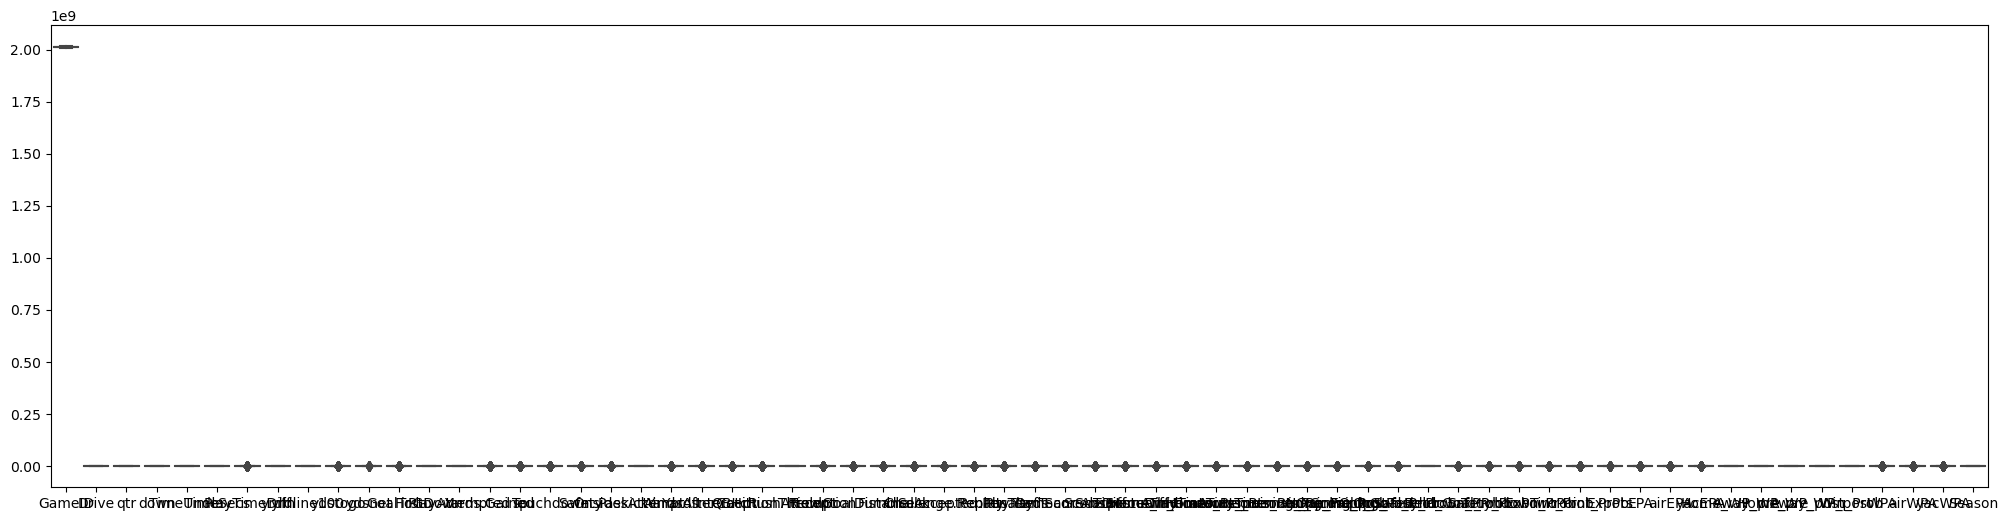

In [49]:
# Visualize potential outliers using a boxplot
plt.figure(figsize=(25,6))
sns.boxplot(data=df)
plt.show()

In [50]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outlier_indices = []
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_indices.extend(outliers.index)
    return set(outlier_indices)  # Return unique indices of outliers

# Detect outliers
outlier_indices = detect_outliers_iqr(df)
print("Indices of outliers:")
print(outlier_indices)

Indices of outliers:
{0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 23, 24, 25, 26, 27, 29, 30, 31, 34, 37, 39, 40, 41, 42, 44, 45, 46, 47, 48, 51, 53, 55, 58, 59, 61, 62, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 94, 96, 99, 100, 101, 102, 103, 104, 105, 107, 110, 111, 112, 113, 114, 116, 117, 118, 119, 122, 125, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 172, 173, 174, 175, 176, 177, 178, 180, 182, 183, 185, 186, 187, 190, 191, 193, 194, 195, 197, 200, 203, 205, 206, 207, 208, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 224, 226, 227, 228, 229, 230, 232, 236, 237, 239, 240, 241, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 256, 260, 261, 263, 264, 265, 266, 267, 268, 269, 272, 274, 276, 277, 282, 284, 285, 286, 287, 288, 289, 292, 

In [52]:
# Feature Engineering: Create new features (e.g., Total Yards, Game Time left in seconds)

df['TotalYards'] = df['Yards.Gained'] + df['AirYards']
df['GameTimeLeft'] = df['TimeSecs'] - df['PlayTimeDiff']

In [55]:
# Normalization and Scaling using MinMaxScaler and StandardScaler

scaler = MinMaxScaler()
df[['TotalYards', 'GameTimeLeft']] = scaler.fit_transform(df[['TotalYards', 'GameTimeLeft']])


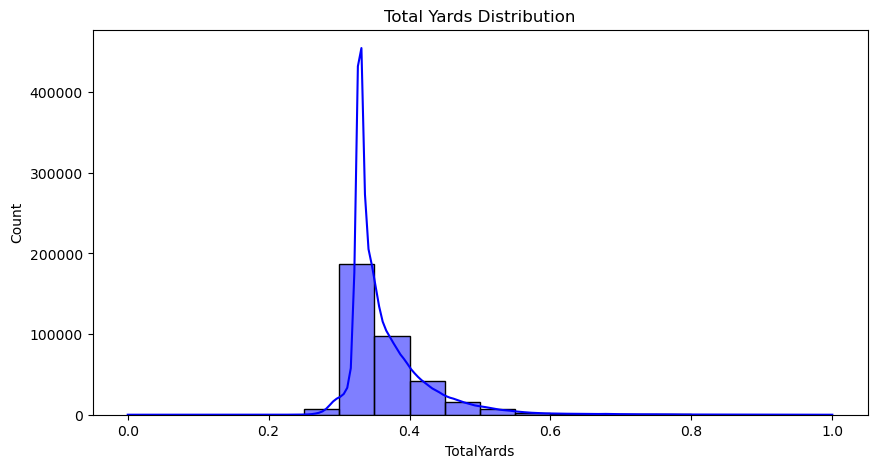

In [56]:
# Explore distributions - Statistical Method: Visualizing distributions

plt.figure(figsize=(10, 5))
sns.histplot(df['TotalYards'], kde=True, bins=20, color='blue')
plt.title('Total Yards Distribution')
plt.show()

C:\Users\rajug\AppData\Local\Temp\ipykernel_924\320333733.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


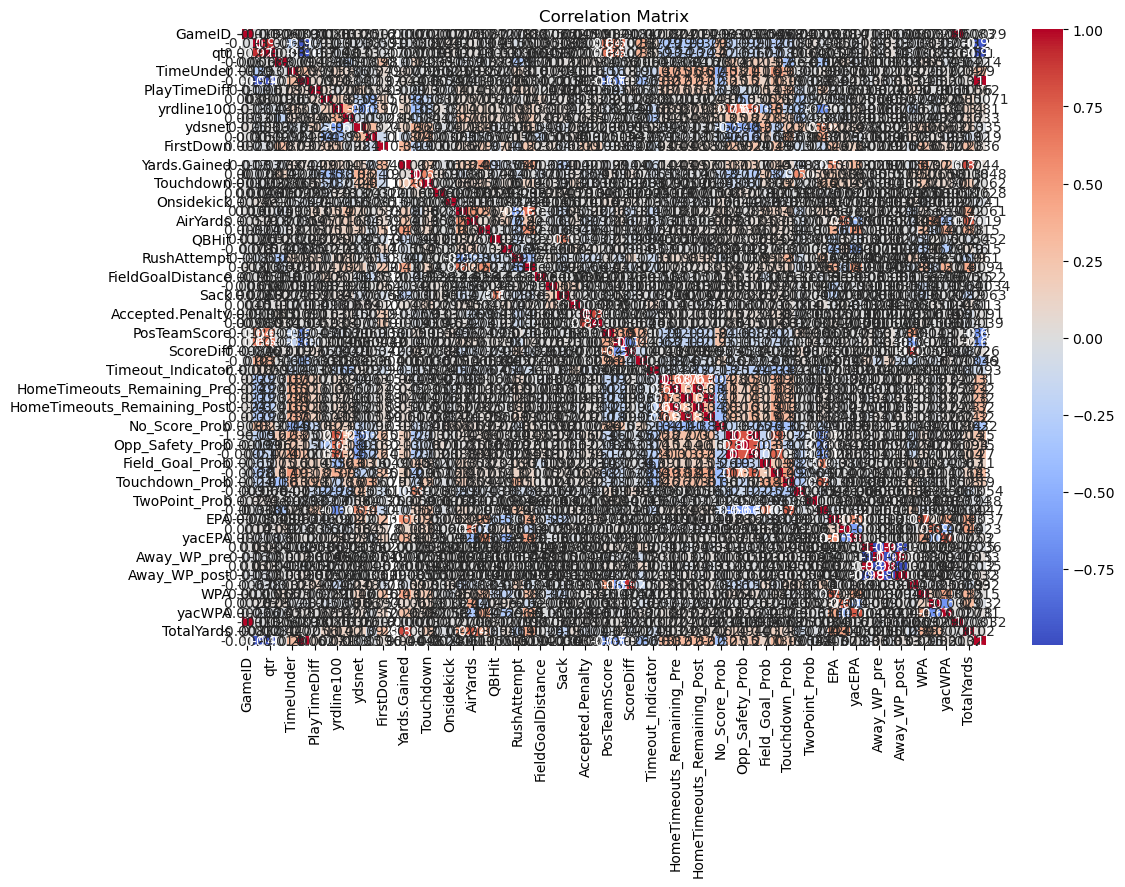

In [58]:
# Correlation Matrix - Visualize relationships

corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [60]:
# Data Quality Check

print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Date            0
GameID          0
Drive           0
qtr             0
down            0
               ..
airWPA          0
yacWPA          0
Season          0
TotalYards      0
GameTimeLeft    0
Length: 104, dtype: int64
